In [129]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
from DatenSammlung import DatenVergangenheitHolen, FeiertageHolen, WetterVorhersageNBG
from DatenVerarbeitung import DatenVerarbeitung

#import streamlit as st
from datetime import date

In [130]:
today = date.today()

In [128]:
df = DatenVerarbeitung()

KeyboardInterrupt: 

In [4]:
WetterVorhersage = WetterVorhersageNBG()

  0%|          | 0/1 [00:00<?, ?it/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   0%|          | 0.00/37.9M [00:00<?, ?iB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   2%|▏         | 736k/37.9M [00:00<00:05, 7.52MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   4%|▍         | 1.44M/37.9M [00:00<00:05, 7.52MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   6%|▌         | 2.15M/37.9M [00:00<00:05, 7.47MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   8%|▊         | 2.87M/37.9M [00:00<00:04, 7.40MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   9%|▉         | 3.58M/37.9M [00:00<00:04, 7.37MiB/s]
https://opendata.dwd.de/weathe

In [111]:
df_test = df

In [112]:
trainings_zeitraum_von = '2020-3-01'
df_test = df_test.loc[df_test.index>trainings_zeitraum_von].copy()

<AxesSubplot:title={'center':'Trainingsdaten am 2021-05-01'}, xlabel='Date'>

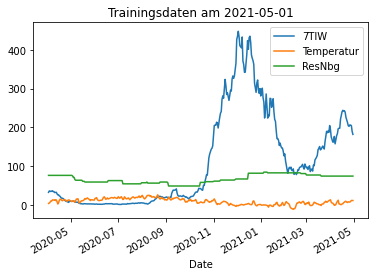

In [113]:
df_test.plot(title='Trainingsdaten am '+str(today))

<AxesSubplot:xlabel='Date'>

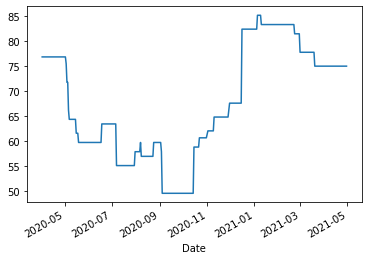

In [114]:
df_test.ResNbg.plot()

In [115]:
df_test= df_test.rename(columns={"7TIW": "y"})
df_test = df_test.reset_index()
df_test= df_test.rename(columns={"Date": "ds"})

In [116]:
#df_test

In [117]:
m = Prophet(changepoint_prior_scale=0.035)
m.add_country_holidays(country_name='DE')
m.add_regressor('Temperatur')
m.add_regressor('ResNbg')
m.fit(df_test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [118]:
#WetterVorhersage.head(20)

In [119]:
future = m.make_future_dataframe(periods=10,include_history=False)
future = future.set_index('ds')
#future.tail(20)

In [120]:
future['Temperatur'] = future.join(WetterVorhersage)
future['ResNbg'] = df_test.ResNbg.iloc[-1]
future = future.reset_index()

In [121]:
future.tail(20)

,ds,Temperatur,ResNbg
0,2021-05-01,9.530769,75.0
1,2021-05-02,7.675,75.0
2,2021-05-03,7.454167,75.0
3,2021-05-04,9.466667,75.0
4,2021-05-05,8.2375,75.0
5,2021-05-06,8.183333,75.0
6,2021-05-07,9.1625,75.0
7,2021-05-08,11.95,75.0
8,2021-05-09,13.766667,75.0
9,2021-05-10,16.075,75.0


In [122]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

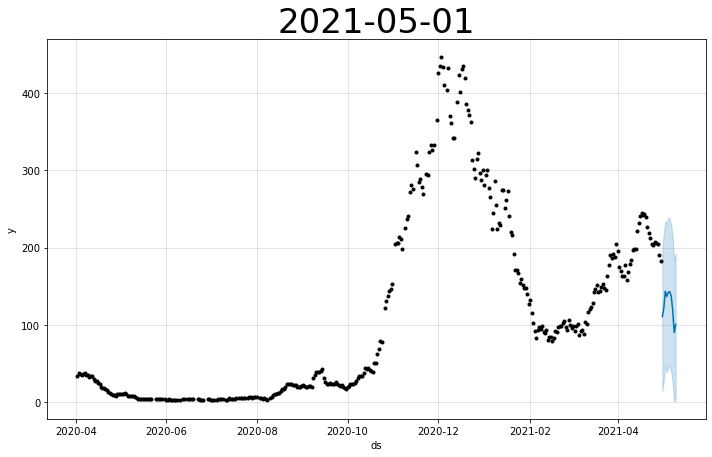

In [123]:
fig = m.plot(forecast)
ax = fig.gca()
ax.set_title(today, size=34)
fig.savefig('Vorhersagen/'+str(today)+'.png')
#plt.close(fig)

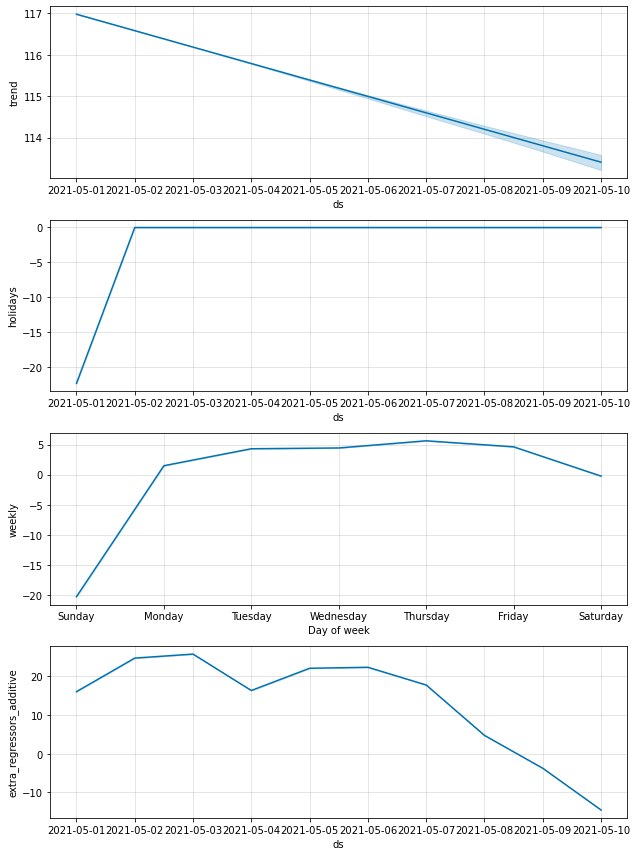

In [124]:
fig2 = m.plot_components(forecast)

In [125]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christi Himmelfahrt,Christi Himmelfahrt_lower,Christi Himmelfahrt_upper,Erster Mai,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-01,116.979106,13.605685,199.407215,116.979106,116.979106,0.0,0.0,0.0,-22.281393,...,-22.281393,-22.281393,-22.281393,-0.235862,-0.235862,-0.235862,0.0,0.0,0.0,110.484362
1,2021-05-02,116.582307,28.210438,219.709337,116.582307,116.582307,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,-20.213346,-20.213346,-20.213346,0.0,0.0,0.0,121.054154
2,2021-05-03,116.185509,48.836564,234.426309,116.185509,116.185509,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,1.489425,1.489425,1.489425,0.0,0.0,0.0,143.390971
3,2021-05-04,115.788710,37.663747,232.908118,115.781522,115.788710,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,4.298244,4.298244,4.298244,0.0,0.0,0.0,136.408694
4,2021-05-05,115.391911,44.838717,239.235255,115.367201,115.396412,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,4.429069,4.429069,4.429069,0.0,0.0,0.0,141.880438
5,2021-05-06,114.995112,46.356528,238.109886,114.945647,115.025023,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,5.615307,5.615307,5.615307,0.0,0.0,0.0,142.922725
6,2021-05-07,114.598313,38.674451,229.472491,114.517043,114.653344,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,4.617162,4.617162,4.617162,0.0,0.0,0.0,136.957057
7,2021-05-08,114.201514,22.767041,214.447836,114.096423,114.286930,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,-0.235862,-0.235862,-0.235862,0.0,0.0,0.0,118.695257
8,2021-05-09,113.804715,0.375498,182.800702,113.664337,113.934480,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,-20.213346,-20.213346,-20.213346,0.0,0.0,0.0,89.840823
9,2021-05-10,113.407916,3.533575,192.436809,113.216936,113.584218,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,1.489425,1.489425,1.489425,0.0,0.0,0.0,100.371556
